In [1]:
import numpy as np
import seaborn as sns
import torch

from pathlib import Path

In [7]:
def get_tensor_filename(sds_str:str, random_seed:int, split:str ) -> str:
    return Path(f"/data/matthew.almeida001/PACS_Sampling_Experiments/results/{sds_str}/cm-tensor-random-seed-{random_seed}-{sds_str}-{split}-best.pt")

In [8]:
seed = 5980
sds_str = "sds"
split = "train"

In [29]:
def get_accuracy_by_epoch(cm_tensor: torch.Tensor) -> torch.Tensor:
    n_correct_by_epoch = torch.Tensor([torch.trace(cm_tensor[i]) for i in range(cm_tensor.shape[0])])
    return n_correct_by_epoch / torch.sum(cm_tensor[0])

In [39]:
train_filename = get_tensor_filename("sds", 5980, "train")
valid_filename = get_tensor_filename("sds", 5980, "val")

In [40]:
train_tensor = torch.load(train_filename)
valid_tensor = torch.load(valid_filename)

In [42]:
train_accuracies = get_accuracy_by_epoch(train_tensor)
val_accuracies = get_accuracy_by_epoch(valid_tensor)

In [44]:
val_accuracies

tensor([0.5918, 0.7432, 0.7171, 0.6377, 0.6973, 0.6055, 0.6985, 0.7481, 0.6253,
        0.6340, 0.6737, 0.7246, 0.7407, 0.6514, 0.6266, 0.7556, 0.6563, 0.6675,
        0.7022, 0.7283, 0.6873, 0.7432, 0.6762, 0.6538, 0.6737, 0.6799, 0.7072,
        0.6625, 0.7258, 0.7767, 0.7618, 0.7196, 0.7333, 0.7928, 0.7680, 0.7221,
        0.6452, 0.6836, 0.7283, 0.7270, 0.7370, 0.8027, 0.6650, 0.6203, 0.6923,
        0.7854, 0.8002, 0.7444, 0.6911, 0.7395, 0.7258, 0.7357, 0.7097, 0.7643,
        0.7246, 0.7084, 0.7109, 0.6960, 0.7320, 0.7655, 0.7717, 0.7233, 0.7754,
        0.7506, 0.7680, 0.7432, 0.7841, 0.7531, 0.7370, 0.7556, 0.7903, 0.7978,
        0.8102, 0.8127, 0.8065, 0.8127, 0.8089, 0.7940, 0.7829, 0.7754, 0.7754,
        0.7730, 0.8362, 0.7878, 0.7940, 0.7891, 0.7990, 0.7891, 0.7928, 0.7903,
        0.7841, 0.7891, 0.7878, 0.7891, 0.7866, 0.8027, 0.7903, 0.7841, 0.7866,
        0.7841])

<AxesSubplot:>

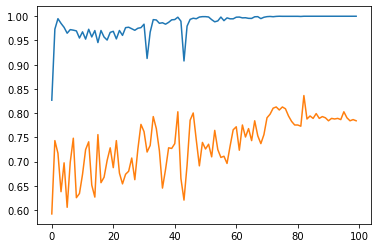

In [49]:
sns.lineplot(x=torch.arange(train_accuracies.shape[0]), y=train_accuracies)
sns.lineplot(x=torch.arange(train_accuracies.shape[0]), y=val_accuracies)